In [30]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import os
import galsim
import numpy as np
import matplotlib.pylab as plt
import time
import fpfs

import batsim.pltutil as batplot
from batsim.stamp import Stamp
from batsim.transforms import LensTransform

1041.6495993583885


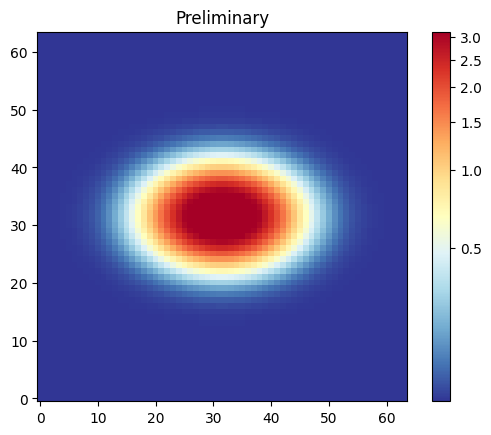

In [31]:
## create a galaxy with raidall dependent shear
flux = 40
scale = 0.2
nn = 64
hlr = 1.4

# create galaxy to be sampled by shear stamp objects
sersic_gal = galsim.Sersic(n=0.5, half_light_radius=hlr, flux=flux, trunc=0)

gamma1 = 0.2
gamma2 = 0.0
kappa= 0.0

g1 = gamma1/(1-kappa)
g2 = gamma2/(1-kappa)
mu = 1/((1-kappa)**2 - gamma1**2 - gamma2**2)

# # apply lensing shear to galaxy
stamp = Stamp(nn=nn, scale=scale, centering='galsim')
lens = LensTransform(gamma1=g1, gamma2=g2, kappa=kappa, center=[-0.5*scale, -0.5*scale])
stamp.transform_grids(lens)

# get galaxy array from stamp object
gal_array = stamp.sample_galaxy(sersic_gal)
print(np.sum(gal_array))
batplot.make_plot_image(gal_array)
#plt.contour(gal_array)
plt.title('Preliminary')
plt.colorbar()

1041.6495


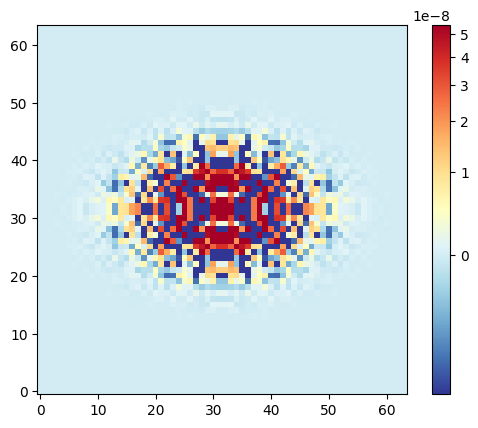

In [32]:
gal_compare = sersic_gal.lens(g1=g1, g2=g2, mu = mu).drawImage(nx=64, ny=64, scale=scale, method='sb')
gal_compare = gal_compare.array
print(np.sum(gal_compare))
batplot.make_plot_image(gal_array- gal_compare)
plt.colorbar()